# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [1]:
import sys
sys.path.insert(0, '..')

Check recommended package versions:

In [2]:
from python_environment_check import check_packages


d = {
    'numpy': '1.21.2',
    'pandas': '1.3.2',
    'sklearn': '1.0',
    'torch': '1.8',
    'torchvision': '0.9.0'
}
check_packages(d)

[OK] Your Python version is 3.8.12 | packaged by conda-forge | (default, Oct 12 2021, 21:59:51) 
[GCC 9.4.0]
[OK] numpy 1.22.0
[OK] pandas 1.4.1
[OK] sklearn 1.0.2
[OK] torch 1.10.1+cu102
[OK] torchvision 0.11.2+cu102


# Chapter 13: Going Deeper -- the Mechanics of PyTorch (Part 2/3)

**Outline**

- [Project one - predicting the fuel efficiency of a car](#Project-one----predicting-the-fuel-efficiency-of-a-car)
  - [Working with feature columns](#Working-with-feature-columns)
  - [Training a DNN regression model](#Training-a-DNN-regression-model)
- [Project two - classifying MNIST handwritten digits](#Project-two----classifying-MNIST-handwritten-digits)

In [3]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from IPython.display import Image

## Project one - predicting the fuel efficiency of a car


### Working with feature columns



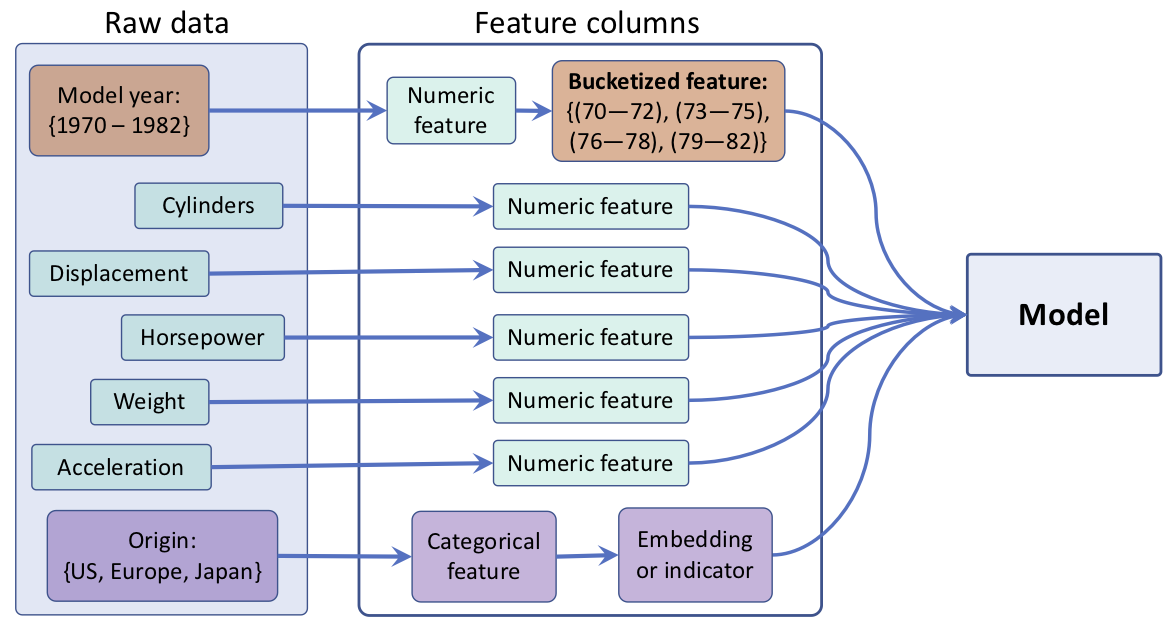

In [24]:
Image(filename='figures/13_07.png', width=700)

In [5]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names,
                 na_values = "?", comment='\t',
                 sep=" ", skipinitialspace=True)

df.tail()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
393          82       1  
394          82       2  
395          82       1  
396          82       1  
397          82       1

In [6]:
print(df.isna().sum())

df = df.dropna()
df = df.reset_index(drop=True)
df.tail()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
387  27.0          4         140.0        86.0  2790.0          15.6   
388  44.0          4          97.0        52.0  2130.0          24.6   
389  32.0          4         135.0        84.0  2295.0          11.6   
390  28.0          4         120.0        79.0  2625.0          18.6   
391  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
387          82       1  
388          82       2  
389          82       1  
390          82       1  
391          82       1

In [7]:
import sklearn
import sklearn.model_selection


df_train, df_test = sklearn.model_selection.train_test_split(df, train_size=0.8, random_state=1)
train_stats = df_train.describe().transpose()
train_stats

count         mean         std     min     25%     50%     75%  \
MPG           313.0    23.404153    7.666909     9.0    17.5    23.0    29.0   
Cylinders     313.0     5.402556    1.701506     3.0     4.0     4.0     8.0   
Displacement  313.0   189.512780  102.675646    68.0   104.0   140.0   260.0   
Horsepower    313.0   102.929712   37.919046    46.0    75.0    92.0   120.0   
Weight        313.0  2961.198083  848.602146  1613.0  2219.0  2755.0  3574.0   
Acceleration  313.0    15.704473    2.725399     8.5    14.0    15.5    17.3   
Model Year    313.0    75.929712    3.675305    70.0    73.0    76.0    79.0   
Origin        313.0     1.591054    0.807923     1.0     1.0     1.0     2.0   

                 max  
MPG             46.6  
Cylinders        8.0  
Displacement   455.0  
Horsepower     230.0  
Weight        5140.0  
Acceleration    24.8  
Model Year      82.0  
Origin           3.0

In [8]:
from packaging import version


numeric_column_names = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']

df_train_norm, df_test_norm = df_train.copy(), df_test.copy()


if version.parse(pd.__version__) >= version.parse("2.0.0"):

    for col_name in numeric_column_names:
        mean = train_stats.loc[col_name, 'mean']
        std = train_stats.loc[col_name, 'std']
        df_train_norm[col_name] = (df_train_norm[col_name] - mean) / std
        df_test_norm[col_name] = (df_test_norm[col_name] - mean) / std

else:

    for col_name in numeric_column_names:
        mean = train_stats.loc[col_name, 'mean']
        std  = train_stats.loc[col_name, 'std']
        df_train_norm.loc[:, col_name] = (df_train_norm.loc[:, col_name] - mean) / std
        df_test_norm.loc[:, col_name] = (df_test_norm.loc[:, col_name] - mean) / std
        
df_train_norm.tail()

MPG  Cylinders  Displacement  Horsepower    Weight  Acceleration  \
203  28.0  -0.824303     -0.901020   -0.736562 -0.950031      0.255202   
255  19.4   0.351127      0.413800   -0.340982  0.293190      0.548737   
72   13.0   1.526556      1.144256    0.713897  1.339617     -0.625403   
235  30.5  -0.824303     -0.891280   -1.053025 -1.072585      0.475353   
37   14.0   1.526556      1.563051    1.636916  1.470420     -1.359240   

     Model Year  Origin  
203          76       3  
255          78       1  
72           72       1  
235          77       1  
37           71       1

In [9]:
boundaries = torch.tensor([73, 76, 79])
 
v = torch.tensor(df_train_norm['Model Year'].values)
df_train_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right=True)

v = torch.tensor(df_test_norm['Model Year'].values)
df_test_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right=True)

numeric_column_names.append('Model Year Bucketed')

In [10]:
from torch.nn.functional import one_hot


total_origin = len(set(df_train_norm['Origin']))

origin_encoded = one_hot(torch.from_numpy(df_train_norm['Origin'].values) % total_origin)
x_train_numeric = torch.tensor(df_train_norm[numeric_column_names].values)
x_train = torch.cat([x_train_numeric, origin_encoded], 1).float()
 
origin_encoded = one_hot(torch.from_numpy(df_test_norm['Origin'].values) % total_origin)
x_test_numeric = torch.tensor(df_test_norm[numeric_column_names].values)
x_test = torch.cat([x_test_numeric, origin_encoded], 1).float()


In [11]:
y_train = torch.tensor(df_train_norm['MPG'].values).float()
y_test = torch.tensor(df_test_norm['MPG'].values).float()

In [12]:
from torch.utils.data import DataLoader, TensorDataset


train_ds = TensorDataset(x_train, y_train)
batch_size = 8
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [13]:
hidden_units = [8, 4]
input_size = x_train.shape[1]

all_layers = []
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit

all_layers.append(nn.Linear(hidden_units[-1], 1))

model = nn.Sequential(*all_layers)

model

Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [14]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [15]:
torch.manual_seed(1)
num_epochs = 200
log_epochs = 20 
for epoch in range(num_epochs):
    loss_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss_hist_train/len(train_dl):.4f}')
 

Epoch 0  Loss 536.1047
Epoch 20  Loss 8.4361
Epoch 40  Loss 7.8695
Epoch 60  Loss 7.1891
Epoch 80  Loss 6.7062
Epoch 100  Loss 6.7599
Epoch 120  Loss 6.3124
Epoch 140  Loss 6.6864
Epoch 160  Loss 6.7648
Epoch 180  Loss 6.2156


In [16]:
with torch.no_grad():
    pred = model(x_test.float())[:, 0]
    loss = loss_fn(pred, y_test)
    print(f'Test MSE: {loss.item():.4f}')
    print(f'Test MAE: {nn.L1Loss()(pred, y_test).item():.4f}')

Test MSE: 9.6133
Test MAE: 2.1211


## Project two - classifying MNIST hand-written digits

In [18]:
import torchvision 
from torchvision import transforms 


image_path = './'
transform = transforms.Compose([transforms.ToTensor()])

mnist_train_dataset = torchvision.datasets.MNIST(root=image_path, 
                                           train=True, 
                                           transform=transform, 
                                           download=True)
mnist_test_dataset = torchvision.datasets.MNIST(root=image_path, 
                                           train=False, 
                                           transform=transform, 
                                           download=False)
 
batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, batch_size, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [19]:
hidden_units = [32, 16]
image_size = mnist_train_dataset[0][0].shape
input_size = image_size[0] * image_size[1] * image_size[2]

all_layers = [nn.Flatten()]
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit

all_layers.append(nn.Linear(hidden_units[-1], 10))
model = nn.Sequential(*all_layers)

model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=32, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32, out_features=16, bias=True)
  (4): ReLU()
  (5): Linear(in_features=16, out_features=10, bias=True)
)

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

torch.manual_seed(1)
num_epochs = 20
for epoch in range(num_epochs):
    accuracy_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist_train += is_correct.sum()
    accuracy_hist_train /= len(train_dl.dataset)
    print(f'Epoch {epoch}  Accuracy {accuracy_hist_train:.4f}')

Epoch 0  Accuracy 0.8531
Epoch 1  Accuracy 0.9287
Epoch 2  Accuracy 0.9413
Epoch 3  Accuracy 0.9506
Epoch 4  Accuracy 0.9558
Epoch 5  Accuracy 0.9592
Epoch 6  Accuracy 0.9627
Epoch 7  Accuracy 0.9650
Epoch 8  Accuracy 0.9674
Epoch 9  Accuracy 0.9691
Epoch 10  Accuracy 0.9711
Epoch 11  Accuracy 0.9729
Epoch 12  Accuracy 0.9741
Epoch 13  Accuracy 0.9747
Epoch 14  Accuracy 0.9767
Epoch 15  Accuracy 0.9779
Epoch 16  Accuracy 0.9782
Epoch 17  Accuracy 0.9799
Epoch 18  Accuracy 0.9808
Epoch 19  Accuracy 0.9813


In [21]:
pred = model(mnist_test_dataset.data / 255.)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean():.4f}') 
 

Test accuracy: 0.9645


---

Readers may ignore the next cell.

In [23]:
! python ../.convert_notebook_to_script.py --input ch13_part2.ipynb --output ch13_part2.py

[NbConvertApp] Converting notebook ch13_part2.ipynb to script
[NbConvertApp] Writing 7052 bytes to ch13_part2.py
